## Image Loaded

In [1]:
#Get filenames in the list
# Import functions 
from os import listdir
from os.path import isfile, join

# Specify the path to the directory that contains dataset
mypath = "./dataset/"

# Use list comprehension to get a list of file in specified directory
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# Print the number of images loaded
print(str(len(file_names)) + ' images loaded')


8885 images loaded


## Splitting loaded images into training and validation dataset

In [2]:
import cv2
import numpy as np 
import sys 
import os 
import shutil 

ripe_count = 0
unripe_count = 0
overripe_count = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150
ripe_dir_train = "./datasets/train/ripe/"
unripe_dir_train = "./datasets/train/unripe/"
overripe_dir_train = "./datasets/train/overripe/"
ripe_dir_val = "./datasets/validation/ripe/"
unripe_dir_val = "./datasets/validation/unripe/"
overripe_dir_val = "./datasets/validation/overripe/"

# Create the directory
def make_dir(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory) # To remove existing directory 
    os.makedirs(directory) # To create new directory
    
make_dir(ripe_dir_train)
make_dir(unripe_dir_train)
make_dir(overripe_dir_train)
make_dir(ripe_dir_val)
make_dir(unripe_dir_val)
make_dir(overripe_dir_val)

# File naming
def getZeros(number):
    if(number > 10 and number < 100):
        return "0" 
    if(number < 10):
        return "00"
    else: 
        return ""

# Loop for each file in dataset
for i, file in enumerate(file_names):
    
    if file_names[i][0] == "r":
        ripe_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if ripe_count <= training_size:
            # If the count is within the training size, add to the training set
            training_images.append(image)
            training_labels.append(1)
            zeros = getZeros(ripe_count)
            cv2.imwrite(ripe_dir_train + "ripe" + str(zeros) + str(ripe_count) + ".jpg", image)
        if ripe_count > training_size and ripe_count <= training_size + test_size:
            # If the count is withing the test size, add to the test set
            test_images.append(image)
            test_labels.append(1)
            zeros = getZeros(ripe_count-1000)
            cv2.imwrite(ripe_dir_val + "ripe" + str(zeros) + str(ripe_count-1000) + ".jpg", image)
            
    if file_names[i][0] == "u":
        unripe_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if unripe_count <= training_size:
            training_images.append(image)
            training_labels.append(2)
            zeros = getZeros(unripe_count)
            cv2.imwrite(unripe_dir_train + "unripe" + str(zeros) + str(unripe_count) + ".jpg", image)
        if unripe_count > training_size and unripe_count <= training_size + test_size:
            test_images.append(image)
            test_labels.append(2)
            zeros = getZeros(unripe_count-1000)
            cv2.imwrite(unripe_dir_val + "unripe" + str(zeros) + str(unripe_count-1000) + ".jpg", image)
         
    if file_names[i][0] == "o":
        overripe_count += 1
        image = cv2.imread(mypath+file)
        image = cv2.resize(image, (size, size), interpolation = cv2.INTER_AREA)
        if overripe_count <= training_size:
            training_images.append(image)
            training_labels.append(3)
            zeros = getZeros(overripe_count)
            cv2.imwrite(overripe_dir_train + "overripe" + str(zeros) + str(overripe_count) + ".jpg", image)
        if overripe_count > training_size and overripe_count <= training_size + test_size:
            test_images.append(image)
            test_labels.append(3)
            zeros = getZeros(overripe_count-1000)
            cv2.imwrite(overripe_dir_val + "overripe" + str(zeros) + str(overripe_count-1000) + ".jpg", image)

    # Stop the loop once the desired number of imaged is reached
    if ripe_count == training_size+test_size and unripe_count == training_size+test_size and overripe_count == training_size+test_size:
        break

print("Training and Test Data Extraction Complete")

Training and Test Data Extraction Complete


## Save datasets

- used to store the loaded data into the NPZ(NumPy Zip) files. 
- used NPZ because it can save multiple arrays into a single file 

In [3]:
# Using numpy's savez function to store our loaded data as NPZ files
np.savez('banana_ripeness_training_data.npz', np.array(training_images))
np.savez('banana_ripeness_training_labels.npz', np.array(training_labels))
np.savez('banana_ripeness_test_data.npz', np.array(test_images))
np.savez('banana_ripeness_test_labels.npz', np.array(test_labels))

In [4]:
import numpy as np

# Define function named
def load_data_training_and_test(datasetname):
    try:
        npzfile = np.load(datasetname + "_training_data.npz")
        train = npzfile['arr_0']
        
        npzfile = np.load(datasetname + "_training_labels.npz")
        train_labels = npzfile['arr_0']
        
        npzfile = np.load(datasetname + "_test_data.npz")
        test = npzfile['arr_0']
        
        npzfile = np.load(datasetname + "_test_labels.npz")
        test_labels = npzfile['arr_0']

        return (train, train_labels), (test, test_labels)
    except FileNotFoundError:
        print(f"Error: One or more files not found for dataset {datasetname}.")
        return None

## Show loaded images 



In [5]:
import cv2
import numpy as np

# Loop to display 14 randoms images 
for i in range(1, 15):
    # Generate a random index to select a random image from the training dataset
    random_index = np.random.randint(0, len(training_images))
    random_image = training_images[random_index].copy()  # Make a copy to avoid modifying the original image
    label = training_labels[random_index]

    cv2.imshow("image_" + str(i), random_image)

    # Print the label of the displayed image 
    if label == 1:
        print(str(i) + " - Ripe")
    elif label == 2:
        print(str(i) + " - Unripe")
    elif label == 3:
        print(str(i) + " - Overripe")
    else:
        print(str(i) + " - Unknown Label")

    cv2.waitKey(0)  # Display each image for 1000 milliseconds (1 second)

cv2.destroyAllWindows()


1 - Ripe
2 - Unripe
3 - Overripe
4 - Unripe
5 - Overripe
6 - Overripe
7 - Overripe
8 - Overripe
9 - Ripe
10 - Overripe
11 - Ripe
12 - Unripe
13 - Unripe
14 - Overripe


In [6]:
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = load_data_training_and_test("banana_ripeness")

# Reshaping our label data from (2000,) to (2000,1) and test data from (1000,) to (1000,1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3000, 150, 150, 3)
(3000, 1)
(1500, 150, 150, 3)
(1500, 1)


## Create model using simple CNN 

In [7]:
from __future__ import print_function
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 25

img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

## Training model

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to be in the range [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create data generators for training and validation
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
validation_generator = datagen.flow(x_test, y_test, batch_size=batch_size)

# Train the model using fit_generator
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(x_test) // batch_size
)


# Save the model in the native Keras format
model.save("./Trained Models/banana_ripeness_V1.keras")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

C:\Users\ACER\AppData\Local\Temp\ipykernel_14920\1741877388.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
187/187 [==============================] - 48s 254ms/step - loss: 1105528.0000 - accuracy: 0.5013 - val_loss: 2244704.5000 - val_accuracy: 1.0000
Epoch 2/25
187/187 [==============================] - 57s 307ms/step - loss: 19736648.0000 - accuracy: 0.5064 - val_loss: 21994418.0000 - val_accuracy: 1.0000
Epoch 3/25
187/187 [==============================] - 54s 291ms/step - loss: 105693768.0000 - accuracy: 0.5027 - val_loss: 87292192.0000 - val_accuracy: 1.0000
Epoch 4/25
187/187 [==============================] - 47s 251ms/step - loss: 334910624.0000 - accuracy: 0.5000 - val_loss: 223409824.0000 - val_accuracy: 1.0000
Epoch 5/25
187/187 [==============================] - 46s 244ms/step - loss: 816056576.0000 - accuracy: 0.4605 - val_loss: 474149056.0000 - val_accuracy: 1.0000
Epoch 6/25
187/187 [==============================] - 47s 252ms/step - loss: 1712712320.0000 - accuracy: 0.4584 - val_loss: 879249920.0000 - val_accuracy: 1.0000
Epoch 7/25
187/187 [====================

## Testing Classifier

In [9]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model("./Trained Models/banana_ripeness_V1.keras")

def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    if pred == "[0]":
        pred = "ripe"
    if pred == "[1]":
        pred = "unripe"
    if pred == "[2]":
        pred = "overripe"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    #expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (252, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Test Image", imageL)

    input_im = input_im.reshape(1,150,150,3) 
    
    ## Get Prediction
    predictions = classifier.predict(input_im)
    predicted_class = predictions.argmax()  # Get the class index with the highest probability
    res = str(predicted_class)

    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


## Train the classifier

In [10]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (150, 150, 3)
img_width = 150
img_height = 150

nb_train_samples = 2000
nb_validation_samples = 1000
batch_size = 16
epochs = 25

train_data_dir = './datasets/train'
validation_data_dir = './datasets/validation'

# Creating data generator for the test data
validation_datagen = ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale = 1./255)

# Creating our data generator for our training data
train_datagen = ImageDataGenerator(
      rescale = 1./255,              # normalize pixel values to [0,1]
      rotation_range = 30,           # randomly applies rotations
      width_shift_range = 0.3,       # randomly applies width shifting
      height_shift_range = 0.3,      # randomly applies height shifting
      horizontal_flip = True,        # randonly flips the image
      fill_mode = 'nearest')         # uses the fill mode nearest to fill gaps created by the above

# Specify criteria about our training data, such as the directory, image size, batch size and type 
# automagically retrieve images and their classes for train and validation sets
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = False)    

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


## Create model

In [11]:
# Creating out model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                 

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

C:\Users\ACER\AppData\Local\Temp\ipykernel_14920\3125219199.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
125/125 [==============================] - 35s 277ms/step - loss: 4.6567 - accuracy: 0.3323 - val_loss: 405.7131 - val_accuracy: 0.4960
Epoch 2/25
125/125 [==============================] - 30s 239ms/step - loss: -585.3419 - accuracy: 0.3368 - val_loss: 19198.3906 - val_accuracy: 0.4960
Epoch 3/25
125/125 [==============================] - 30s 240ms/step - loss: -7776.2505 - accuracy: 0.3318 - val_loss: 185430.3906 - val_accuracy: 0.4960
Epoch 4/25
125/125 [==============================] - 32s 260ms/step - loss: -19616.2285 - accuracy: 0.3370 - val_loss: 314680.1562 - val_accuracy: 0.4950
Epoch 5/25
125/125 [==============================] - 31s 251ms/step - loss: -53817.6016 - accuracy: 0.3223 - val_loss: 782923.0625 - val_accuracy: 0.4950
Epoch 6/25
125/125 [==============================] - 32s 252ms/step - loss: -135918.5938 - accuracy: 0.3208 - val_loss: 948404.9375 - val_accuracy: 0.4919
Epoch 7/25
125/125 [==============================] - 30s 242ms/step - loss: -409

## Plotting Loss and Accuracy Graphs

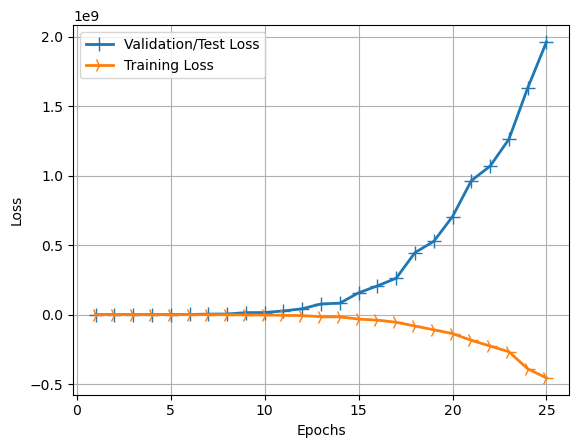

In [13]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

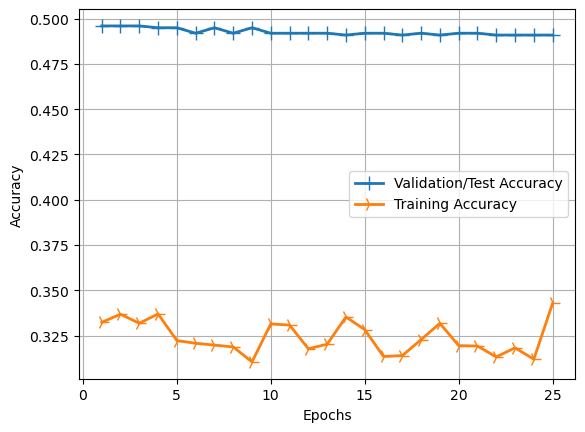

In [14]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Webcam 

In [15]:
import cv2
import numpy as np
import sqlite3
from datetime import datetime
from keras.models import load_model
from keras.preprocessing import image 

def detect_ripeness(frame):
    # Convert the frame to HSV (Hue, Saturation, Value)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define the ranges for different banana ripeness levels
    lower_unripe = np.array([30, 50, 50])
    upper_unripe = np.array([60, 255, 255])

    lower_ripe = np.array([15, 100, 50])
    upper_ripe = np.array([30, 255, 255])

    lower_overripe = np.array([0, 50, 50])
    upper_overripe = np.array([15, 255, 255])

    # Create masks to extract regions of different ripeness levels
    mask_unripe = cv2.inRange(hsv, lower_unripe, upper_unripe)
    mask_ripe = cv2.inRange(hsv, lower_ripe, upper_ripe)
    mask_overripe = cv2.inRange(hsv, lower_overripe, upper_overripe)

    # Combine the masks to get the final mask
    mask = mask_unripe + mask_ripe + mask_overripe

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if contours are found
    if contours:
        # Find the contour with the maximum area
        max_contour = max(contours, key=cv2.contourArea)

        # Calculate the area of the contour
        contour_area = cv2.contourArea(max_contour)

        # Define threshold areas for ripeness levels
        unripe_threshold = 1000
        ripe_threshold = 2000
        overripe_threshold = 3000

        # Compare the contour area with the thresholds
        if contour_area < unripe_threshold:
            return "Unripe"
        elif contour_area < ripe_threshold:
            return "Ripe"
        elif contour_area < overripe_threshold:
            return "Overripe"
        else:
            return "Unknown Ripeness"
    else:
        return "No banana detected"
    
    print(f'Ripeness: {result}')
    return result

# Open a connection to the webcam (0 represents the default webcam)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Flip the frame horizontally for better visualization
    frame = cv2.flip(frame, 1)

    # Display the original frame
    cv2.imshow('Banana Ripeness Detection', frame)

    # Get the ripeness result
    ripeness = detect_ripeness(frame)

    # Display the ripeness result on the frame
    cv2.putText(frame, f'Ripeness: {ripeness}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the frame with ripeness information
    cv2.imshow('Banana Ripeness Detection', frame)

    # Break the loop when 'q' key is pressedwhat 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()
